# Linear Regression

Download the required libraries for this notebook by running the cell below. If you are using conda, uncomment and run the conda command. If you are using PIP, uncomment and use the PIP command.

COME BACK AND MAKE CONDA USE ENVIRONMENT.YML TO LOAD INSTEAD OF REQUIREMENTS.TXT

In [113]:
import sys
#!conda install --yes --prefix {sys.prefix} 
#!{sys.executable} -m pip install -r requirements.txt

In [114]:
import time
import re
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline 
import matplotlib.pyplot as plt

# Ensures that all dataframes are displayed on one line instead of breaking columns across multiple lines
pd.set_option('display.expand_frame_repr', False)

## Import the Data

For this example, the gold medal results of olympic track and field events will be used to show linear regression in action. The men's marathon times from 1896 to 2016 will be used to draw a line of best fit. The original dataset can be found [here](https://www.kaggle.com/datasets/jayrav13/olympic-track-field-results/discussion/272523).

In [115]:
df = pd.read_csv('https://raw.githubusercontent.com/wrmthorne/linear-regression/main/olympic_data.csv', encoding='unicode_escape')

# Print some information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       2394 non-null   object 
 1   Event        2394 non-null   object 
 2   Location     2394 non-null   object 
 3   Year         2394 non-null   int64  
 4   Medal        2394 non-null   object 
 5   Name         2164 non-null   object 
 6   Nationality  2394 non-null   object 
 7   Result       2394 non-null   object 
 8   Wind         12 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 168.5+ KB
None


### Exercise 1

Extract only the men's marathon results from the full list of data and keep only the 'Year' and 'Result' columns. We are only interested in plotting the year against the time achieved for each year.

Hint: The event is called 'Marathon Men'

In [116]:
# Example answer
data = df[['Year', 'Result']].loc[df.Event == 'Marathon Men']

In [117]:
# Test to see whether your method returned the right results


## Preparing the data

Once we have selected the subset of data we want to use, we need to split it into each separate axis to represent. Since we are only mapping the function of two columns, we can use a function of the form:

$$
y = mx + c
$$

As our independent variable is the year and our dependent variable is the result, we assign $x$ to year and $y$ to time. Because time is in a string format in the dataset, we need to convert it to a numerical form that can be use in arithmetic. As times are represented in a number of different ways in this dataset, we will use [regular expressions](https://docs.python.org/3/library/re.html) for convert them to an integer number of seconds. If they were all in the same format, we could use a library such as [time](https://docs.python.org/3/library/time.html).

In [118]:
# Takes string time format and converts time into integer seconds
def convert_to_seconds(x):
    parsed_x = re.search(r'((?P<hours>\d+).(?P<minutes>\d+).(?P<seconds>\d+))', x)
    hours    = int(parsed_x.group('hours')) * 60 * 60
    minutes  = int(parsed_x.group('minutes')) * 60
    seconds  = int(parsed_x.group('seconds'))
    return hours + minutes + seconds

# Show y before transformation
print(f'Before Transform: {data.Result[:5].values}')

# Convert Results column to be in seconds
results_transformed = data.Result.apply(lambda x: convert_to_seconds(x))

# Show y after transformation
print(f'After Transform:  {results_transformed[:5].values}')

# Assign x and y and shape them into a column vector
x = np.array(data.Year.values)
y = np.array(results_transformed.values)

Before Transform: ['02:08:44' '2:09:54' '2:10:05' '2h06:32' '2h07:16']
After Transform:  [7724 7794 7805 7592 7636]


## Inspecting the Data

Now that we have our data in a computer interpretable format, we can visualise the data to inspect what we expect the result to look like. We can plot the data on a scatter plot and manully visualise where a line of best fit might pass.

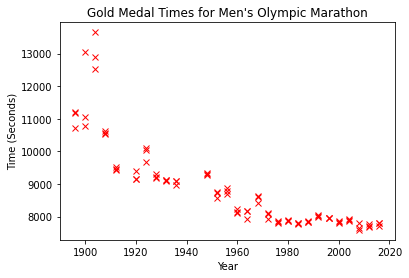

In [119]:
plt.plot(x, y, 'rx')
plt.title('Gold Medal Times for Men\'s Olympic Marathon')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.show()

### Exercise 2

Use a numpy linspace with 100 values to draw a line, on the same plot as our x and y data, with the function:

$$
f(x) = x + 7,000
$$

Make sure not to overwite x with this so you can plot the original x data with this line.

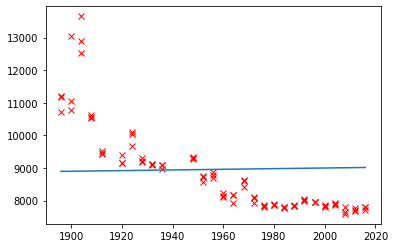

In [120]:
x_test = np.linspace(1896, 2016, 100)

y_test = x_test + 7000

plt.plot(x, y, 'rx')
plt.plot(x_test, y_test)

 ## Fitting the Data
 
 You may be able to see that it doesn't fit the data very well. It roughly intersects the data but it doesn't follow the trend of the data well and would make a very poor prediction. This is finally where linear regression comes into play. Linear regression uses linear algebra to mathematically solve for variables $m$ and $c$ in the above formula to minimise the sum of squares error:

 $$
 E(m, c) = \sum^{n}_{i=1}(y_i - (mx_i + c))^2
 $$

 If you are interested in the maths of linear regression, it will be covered in the extension section of this notebook. If you're not interested, this section will cover how to use the [lingress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) method of [SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/index.html).

 SciPy is a collection of mathematical algorithms and functions, built on numpy to enable a user to easily perform complex tasks with simple methods. Although you have less granular control than other libraries which perform a similar task such as [scikit-learn](https://scikit-learn.org/stable/), the wrapper is simple ans easy to use.

In [121]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

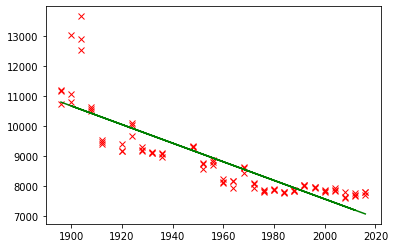

In [122]:
y_lin = slope * x + intercept

plt.plot(x, y, 'rx')
plt.plot(x, y_lin, 'g')

## Improving Our Line of Best Fit

Although our line of best fit generally covers the points, it would still make a bad prediction of the next olympic's gold medal pace. This is because we have applied a linear function to a non-linear distribution of points. This is a limitation of linear regression in its fundamental form but it can be built upon using basis functions.

A basis function $\phi$ directly transforms the original input space $x$, meaning a set of linear parameters can still be used represented with $m$ and $c$, but a non-linear line of best fit can be represented. Simply put, our function to optimise remains the same, but on a transformed variable:

$$
y = mx + c \\
y = m\phi(x) + c
$$

Any function can be used as a basis function but a common basis function is polynomial:

$$
\phi{_j}(x_i^j) \\
\Phi(x) = x + x^2 + x^3 \dots + x^n
$$

For us to use basis functions, we need to first transform our data for $x$ into a new form called a design matrix.

### Exercise 3

Create a design matrix where the data for $x$ is represented in a 2D array of the form:

$$
X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}
$$

Hint: look at np.ones and np.hstack

In [123]:
x_vec = x.reshape(-1, 1)
ones = np.ones((x_vec.size, 1))
X = np.hstack((ones, x_vec))
#print(X)

### Exercise 4

Write a function to calculate the polynomial basis function for input data $x$ (not design matrix as input, just original data) which outputs $\Phi(X)$ in the following form:

$$
\Phi(X) = \begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2 \\
\end{bmatrix}
$$

As a bonus, allow the function to take a parameter to control the number of polynomial terms.

In [127]:
def polynomial(x, num_basis=4):
    x = x.reshape(-1, 1)
    phi = np.zeros((x.size, num_basis))
    for i in range(num_basis):
        phi[:, i:i+1] = x**i
    return phi

#print(polynomial(x))

## Plot New Line of Best Fit

## Extension: The Maths

If you are interested in the maths of linear regression, this section will cover how to implement linear regression manually in numpy. This will also cover the underlying linear algebra involved and generally dig deeper into the topic. If you want every last step in the derivation of all of these formulas, they can be found in [this article](https://towardsdatascience.com/understanding-linear-regression-eaaaed2d983e) and in many other places online.

As stated before, the aim of linear regression is to algebraically solve for $m$ and $c$ in a function of the form:

$$
y = mx + c
$$

There are two ways of minimising the loss w.r.t $m$ and $c$. It can be solved using linear algebra (the method which will be covered here) or it can be performed iteratively, that is, by updating the values by a incremental amount ([learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)) at each iteration of a loop. This is known as [gradient descent](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) and is the primary algorithm used on extremely large models where there is too much data to store in memory at any one time to solve algebraically.

All standard models of linear regression will make use of matrix multiplication. If you haven't used matrices before, [khan academy](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:mat-intro/v/introduction-to-the-matrix) has a really good series on them. We will first cover how to use matrices in numpy.

In [ ]:
# Define matrix A and matrix B (2D numpy arrays)
A = np.random.randint(1, 5, size=(4, 4))
B = np.random.randint(1, 5, size=(4, 4))

print(A, end='\n\n')
print(B)

The dot and outer products of matrices can be performed in numpy simply. Dot product can be performed using np.dot() (or @ but it is very [slightly different](https://stackoverflow.com/questions/34142485/difference-between-numpy-dot-and-python-3-5-matrix-multiplication) in some cases) and the outer product can be calculated with np.outer()

In [ ]:
# np.dot() and @ are basically equivalent
print(np.dot(A, B), end='\n\n')
print(A @ B, end='\n\n')

print(np.outer(A, B))

Matrices can have their inverse inverse and transpose applied

In [ ]:
# Transposition
print(A, end='\n\n')
print(A.T, end='\n\n')

# Inversion
print(np.linalg.inv(A))

We can now show how summation across a formula is equivalent to matrix multiplication when use in a specific way. If we define a really large vector C and we want to find the sum of the sqares of all elements in C, the same operation can be achieved much faster using matrix multiplication:

$$
\sum_{i=1}^{n}c_i^2 = C^T \cdot C
$$

This difference may not seem important for a simple calculation like this but by using matrix multiplication, we avoid iteration which is a major bottle neck in computation

In [ ]:
C = np.random.randint(1, 5, size=10000000)

# Summation 
start_time = time.time()
summation = sum(C**2)
print(f'Summation: {time.time() - start_time:.4f}s')

# Matrix multiplication
start_time = time.time()
mat_mul = np.dot(C.T, C)
print(f'Matrix Multiplication: {time.time() - start_time:.4f}s')

print(f'Equivalent?: {summation == mat_mul}')

Now that we have gone through the basics of matrices in numpy, we can start to look at how we can apply this to linear regression. First, we need to understand how we can convert objective function into a vectorised form. We can take our original objective function and stack the two parameters into a weight matrix $\mathbf{w}$:

$$
 \mathbf{w} = \begin{bmatrix} c \\ m \end{bmatrix} \\

E(\mathbf{w}) = \sum_{i=1}^n (y_i - f(\mathbf{x}_i; \mathbf{w}))^2
$$

In this format, we need $x$ to be in the design-matrix format, covered above. i.e.

$$
x_i = \begin{bmatrix} 1 \\ x_i \end{bmatrix} \\

X = \begin{bmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} 
$$

We can now define the function $f(x_i)$:

$$
f(x_i) = x_i^Tw \\
f(X;\mathbf{w}) = X\mathbf{w}
$$

Now, using the concept we covered above about matrix multiplication being equivalent to summation when performed in a particular manner, we can produce the following equation:

$$
E(\mathbf{w}) = (y - f(X;\mathbf{w}))^T(y-f(X;\mathbf{w}))
$$

If we expand everything out, we can now define our vectorised function of the form:

$$
E(\mathbf{w}) = (y - X\mathbf{w})^T(y-X\mathbf{w})
$$

The next step is to differentiate w.r.t $\mathbf{w}$ to algebraically solve and find the optimimum (where gradient is 0).

$$
\frac{dE\mathbf{w}}{d\mathbf{w}} = -2X^Ty + 2X^TX\mathbf{w}
$$

Here, we are exploiting the fact that $\mathbf{w}$ is the composite of $c$ and $m$ to perform the optimisation for both values at the same time:

$$
\frac{dE\mathbf{w}}{d\mathbf{w}} = \begin{bmatrix} \frac{\partial E(\mathbf{w})}{\partial c} \\ \frac{\partial E(\mathbf{w})}{\partial m} \end{bmatrix}
$$

When we set this value to 0, we can arrange the equation to be in the following form:

$$
X^TX\mathbf{w} = X^T\mathbf{y}
$$

With all of the heavy maths done, we can return to numpy. For solving the differential of our objective function w.r.t. $\mathbf{w}$, we can make use of the [np.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) method which solves systems of linear equations (if there is an exact solution) in the form we have now put our equation into. Taking our matrices A and B from above, we can solve for an arbitraty w based on the form:

$$
A\mathbf{w} = B
$$

In [ ]:
# Automatic linear algebra solving
w = np.linalg.solve(A, B)

print(w)

[[ 12.          16.           1.          21.        ]
 [ 25.66666667  35.           3.          46.66666667]
 [-16.33333333 -23.          -1.         -30.33333333]
 [-20.66666667 -28.          -2.         -37.66666667]]


Putting everything together, we will repeat the linear regression example using the olympic data from before.

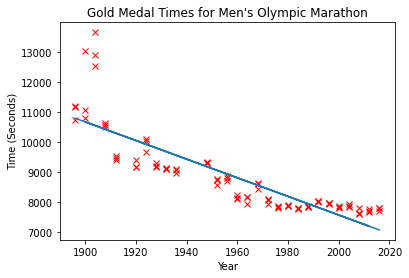

In [ ]:
# Assign x and y and shape them into a column vector
x = np.array(data.Year.values).reshape(-1, 1)
y = np.array(results_transformed.values).reshape(-1, 1)

# Create design matrix
ones = np.ones((x.size, 1))
X = np.hstack((ones, x))

# Solve system of equations
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

# Plot data and line of best fit
plt.plot(x, y, 'rx')
plt.plot(x, np.dot(X, w))
plt.title('Gold Medal Times for Men\'s Olympic Marathon')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.show()